In [19]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DDsmu import DDsmu
from hankel import HankelTransform
from scipy.interpolate import InterpolatedUnivariateSpline as spline 

In [20]:
path = '/Users/ngoc/Desktop/Master-study/project'

In [21]:
#kbins = 2000         # number of bins in k-space 
kbins     = 5000

# Cosmological parameters from Teppei's 1907.00750 paper
h         = 0.673
z         = 0.306
Omega_m   = 0.315
Omega_b   = 0.0492
LambdaCDM = Class()
sigma8    = 0.8309
n_s       = 0.965

LambdaCDM.set({'Omega_b': Omega_b ,
               'Omega_cdm': Omega_m - Omega_b ,
               'h': h ,
               #'A_s' : 2e-9 ,                # primordial perturbation A_s (input either A_s or sigma8)
               'sigma8' : sigma8,             # amplitude of density fluctuations sigma8
               'n_s': n_s ,
               'tau_reio':0.0925,
               'z_pk': z})
LambdaCDM.set({'output':'mPk',
               'P_k_max_1/Mpc':100.0})
LambdaCDM.compute()

#use sigma8 from the paper

In [22]:
f = LambdaCDM.scale_independent_growth_factor_f(z)
D = LambdaCDM.scale_independent_growth_factor(z)


In [23]:
print(f)
print(D)

0.6871684569754593
0.8501441981199028


In [24]:
kk = np.logspace(-10, 2, kbins)
#kk = np.logspace(-4, 2, kbins)
Pk = []
for k in kk :
    Pk.append(LambdaCDM.pk(k, z))

In [25]:
kk_f = np.full_like(kk, 0)
Pk_f = np.full_like(Pk,0)

# change unit of power spectrum
for i in range(0,kbins):
    kk_f[i] = kk[i]/h
    Pk_f[i] = Pk[i]*h**3

Text(0, 0.5, 'P(k)[$(h^{-1}Mpc)^3$]')

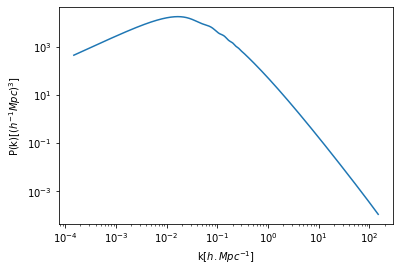

In [26]:
plt.loglog(kk_f, Pk_f)
#plt.ylim(1,)
plt.xlabel('k$[h.Mpc^{-1}]$')
plt.ylabel('P(k)[$(h^{-1}Mpc)^3$]')

In [167]:
k03   = np.loadtxt(path+'/results/power_spectrum03.txt', usecols = (0))
P03   = np.loadtxt(path+'/results/power_spectrum03.txt', usecols = (1))
k   = np.loadtxt(path+'/my_results/matter_Pk.txt', usecols = (0))
P   = np.loadtxt(path+'/my_results/matter_Pk.txt', usecols = (1))
#k05   = np.loadtxt(path+'/results/power_spectrum05.txt', usecols = (0))
#P05   = np.loadtxt(path+'/results/power_spectrum05.txt', usecols = (1))

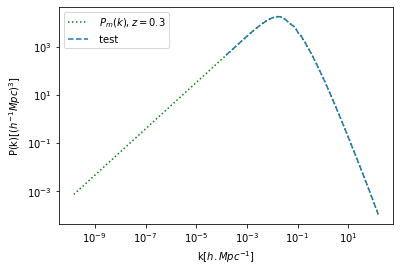

In [169]:
amp = 1.1
#plt.loglog(k05, P05*amp,'b-', label =" $P_m(k), z = 0.5$")
plt.loglog(k03, P03,'g:', label =" $P_m(k), z = 0.3$")
plt.loglog(k, P,'--', label =" test")

#plt.loglog(kk_f,Pk_f,'r-', label =" $P_m(k), z = 0$")
#plt.ylim(1,)
plt.xlabel('k$[h.Mpc^{-1}]$')
plt.ylabel('P(k)[$(h^{-1}Mpc)^3$]')
plt.legend()

In [171]:
y = np.full_like(k03,1)
plt.plot(k03, P03/P,'g:')
plt.plot(k03,y,'r-')
plt.ylim(0.9,1.05)
plt.xlabel('k$[h.Mpc^{-1}]$')
plt.ylabel('P(k)[$(h^{-1}Mpc)^3$]')
plt.title('ratio of Pk over the matter_Pk.txt sigma8 input')
plt.legend()
#plt.savefig('powerspectrum-input-error.png')

ValueError: operands could not be broadcast together with shapes (5000,) (2000,) 

=> that is why I got the inconsistent results: the last one I used A_s for input, while the previous one I use sigma8. 
Now let find which one is correct.